# Heart Failure

In [56]:
# Import Dependencies 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress

In [57]:
# Creating dataframes
fic_df = pd.read_csv("Resources/FIC.Full CSV.csv")
cause_df = pd.read_csv("Resources/cause_of_deaths.csv")

fic_df.head()

,Age,Age.Group,Gender,Locality,Marital status,Life.Style,Sleep,Category,Depression,Hyperlipi,...,oldpeak,slope,ca,thal,num,SK,SK.React,Reaction,Mortality,Follow.Up
0,45,41-50,Female,RURAL,MARRIED,NO,NO,FREE,YES,YES,...,3.0,2,0,7,2,1,NO,0,0,60
1,51,51-60,Female,URBAN,MARRIED,NO,NO,FREE,YES,YES,...,1.2,2,0,7,2,1,NO,0,0,15
2,55,51-60,Female,RURAL,MARRIED,YES,YES,FREE,YES,YES,...,3.4,2,0,3,2,1,NO,0,0,6
3,55,51-60,Female,RURAL,MARRIED,YES,YES,FREE,YES,YES,...,2.0,2,1,7,3,1,NO,0,0,52
4,56,51-60,Female,RURAL,MARRIED,YES,NO,FREE,YES,YES,...,4.0,3,2,7,3,1,NO,0,0,34


In [58]:
# Get dataframe column values
fic_df.columns

Index(['Age', 'Age.Group', 'Gender', 'Locality  ',
       'Marital status                       ',
       'Life.Style                                                                              ',
       'Sleep', 'Category', 'Depression', 'Hyperlipi', 'Smoking',
       'Family.History', 'F.History', 'Diabetes', 'HTN', 'Allergies', 'BP',
       'Thrombolysis', 'BGR', 'B.Urea', 'S.Cr', 'S.Sodium', 'S.Potassium',
       'S.Chloride', 'C.P.K', 'CK.MB', 'ESR', 'WBC', 'RBC', 'Hemoglobin',
       'P.C.V', 'M.C.V', 'M.C.H', 'M.C.H.C', 'PLATELET_COUNT', 'NEUTROPHIL',
       'LYMPHO', 'MONOCYTE', 'EOSINO', 'Others ', 'CO', 'Diagnosis',
       'Hypersensitivity', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
       'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num', 'SK',
       'SK.React', 'Reaction', 'Mortality', 'Follow.Up'],
      dtype='object')

In [59]:
# Cleaning the data columns
fic_df.rename(columns={'Age.Group': 'Age Group', 'Locality  ': 'Locality',
                                'Marital status                       ': 'Marital Status',
                                'Life.Style                                                                              ': 'Life Style',
                                'Hyperlip': 'Hyperlipidemia', 'Family.History': 'Family History',
                                'HTN': 'Hypertension', 'BP': 'Blood Pressure', 'BGR': 'Blood Glucose Level', 'B.urea': 'Blood Urea Nitrogen',
                                'S.Cr': 'Serum Creatinine', 'S.Sodium': 'Serum Sodium', 'S.Potassium': 'Serum Potassium', 'Hyperlipi': 'Hyperlipidemia',
                                'S.Chloride': 'Serum Chloride', 'CPK': 'Creatine Phosphokinase', 'CK.MB': 'Creatine Kinase-MB',
                                'ESR': 'Erythrocyte Sedimentation Rate', 'WBC': 'White Blood Cell', 'RBC': 'Red Blood Cell', 'P.C.V': 'Packed Cell Volume',
                                'M.C.V': 'Mean Corpuscular Volume', 'M.C.H': 'Mean Corpuscular Hemoglobin', 'M.C.H.C': 'Mean Corpuscular Hemoglobin Concentration',
                                'PLATELET_COUNT': 'Platelet Count', 'NEUTROPHIL': 'Neutrophil', 'LYMPHO': 'Lymphocytes', 'MONOCYTE': 'Monocyte', 'EOSINO': 'Eosinophils',
                                'CO': 'Cardiac Output', 'cp': 'Constrictive Pericarditis', 'trestbps': 'Resting Blood Pressure', 'chol': 'Cholesterol',
                                'fbs': 'Fasting Blood Sugar', 'restecg': 'Rest ECG', 'ca': 'Cardiac Arrest', 'thal': 'Thalassemia', 'num': 'Num', 'Follow.Up': 'Follow Up'}, inplace= True)



In [60]:
# Show cleaned up dataframe
fic_df.head()

,Age,Age Group,Gender,Locality,Marital Status,Life Style,Sleep,Category,Depression,Hyperlipidemia,...,oldpeak,slope,Cardiac Arrest,Thalassemia,Num,SK,SK.React,Reaction,Mortality,Follow Up
0,45,41-50,Female,RURAL,MARRIED,NO,NO,FREE,YES,YES,...,3.0,2,0,7,2,1,NO,0,0,60
1,51,51-60,Female,URBAN,MARRIED,NO,NO,FREE,YES,YES,...,1.2,2,0,7,2,1,NO,0,0,15
2,55,51-60,Female,RURAL,MARRIED,YES,YES,FREE,YES,YES,...,3.4,2,0,3,2,1,NO,0,0,6
3,55,51-60,Female,RURAL,MARRIED,YES,YES,FREE,YES,YES,...,2.0,2,1,7,3,1,NO,0,0,52
4,56,51-60,Female,RURAL,MARRIED,YES,NO,FREE,YES,YES,...,4.0,3,2,7,3,1,NO,0,0,34


In [61]:
# Show cleaned up columns to verify
fic_df.columns

Index(['Age', 'Age Group', 'Gender', 'Locality', 'Marital Status',
       'Life Style', 'Sleep', 'Category', 'Depression', 'Hyperlipidemia',
       'Smoking', 'Family History', 'F.History', 'Diabetes', 'Hypertension',
       'Allergies', 'Blood Pressure', 'Thrombolysis', 'Blood Glucose Level',
       'B.Urea', 'Serum Creatinine', 'Serum Sodium', 'Serum Potassium',
       'Serum Chloride', 'C.P.K', 'Creatine Kinase-MB',
       'Erythrocyte Sedimentation Rate', 'White Blood Cell', 'Red Blood Cell',
       'Hemoglobin', 'Packed Cell Volume', 'Mean Corpuscular Volume',
       'Mean Corpuscular Hemoglobin',
       'Mean Corpuscular Hemoglobin Concentration', 'Platelet Count',
       'Neutrophil', 'Lymphocytes', 'Monocyte', 'Eosinophils', 'Others ',
       'Cardiac Output', 'Diagnosis', 'Hypersensitivity',
       'Constrictive Pericarditis', 'Resting Blood Pressure', 'Cholesterol',
       'Fasting Blood Sugar', 'Rest ECG', 'thalach', 'exang', 'oldpeak',
       'slope', 'Cardiac Arrest', 'Tha

In [62]:
# Get values within certain columns for medical conditions
medical_history = fic_df[['Depression', 'Hyperlipidemia',
       'Diabetes', 'Hypertension', 'Allergies',
       'Thrombolysis', 'Hemoglobin',
       'Hypersensitivity', 'Mortality']]

# Showing the new Dataframe
medical_history.head()

,Depression,Hyperlipidemia,Diabetes,Hypertension,Allergies,Thrombolysis,Hemoglobin,Hypersensitivity,Mortality
0,YES,YES,1,NO,NO,0,11.6,NO,0
1,YES,YES,0,NO,NO,0,14.5,NO,0
2,YES,YES,1,YES,NO,0,14.1,NO,0
3,YES,YES,1,YES,NO,0,14.1,NO,0
4,YES,YES,1,YES,NO,0,12.3,NO,0


In [63]:
# Gather mortality count per medical condition
depression = medical_history[['Depression', 'Mortality']].value_counts()
hyperlipidemia = medical_history[['Hyperlipidemia', 'Mortality']].value_counts()
diabetes = medical_history[['Diabetes', 'Mortality']].value_counts()
htn = medical_history[['Hypertension', 'Mortality']].value_counts()
allergies = medical_history[['Allergies', 'Mortality']].value_counts()
throm = medical_history[['Thrombolysis', 'Mortality']].value_counts()
hypers = medical_history[['Hypersensitivity', 'Mortality']].value_counts()

htn

Hypertension  Mortality
NO            0            144
YES           0            144
              1             57
NO            1             23
Name: count, dtype: int64

### Plotting results per medical condition

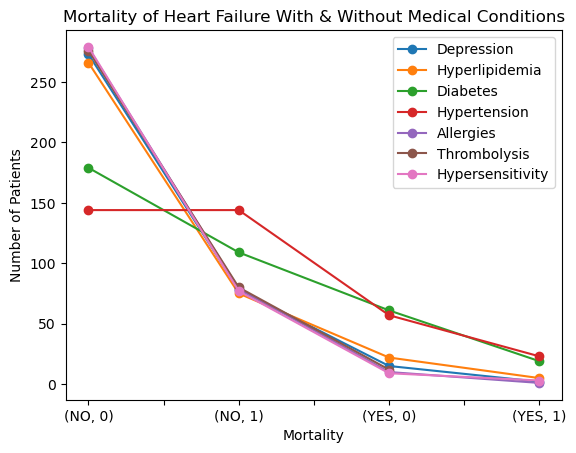

In [64]:
# Depression
depression.plot(marker="o")

# Hyperlipidemia
hyperlipidemia.plot(marker="o")

# Diabetes
diabetes.plot(marker="o")

# Hypertension
htn.plot(marker="o")

# Allergies
allergies.plot(marker="o")

# Thrombolysis
throm.plot(marker="o")

# Hypersensitivity
hypers.plot(marker="o",title= "Mortality of Heart Failure With & Without Medical Conditions", xlabel= "Mortality", ylabel = "Number of Patients")
plt.legend(['Depression', 'Hyperlipidemia', 'Diabetes', 'Hypertension', 'Allergies', 'Thrombolysis', "Hypersensitivity"])


### Comparing total patients to the amount of medical conditions patients have to see correlation between Heart Failure with having certain Medical Conditions

In [65]:
# Full count of Dataset for Heart Failure total
number_of_patients = pd.DataFrame(medical_history[['Depression']].count())
number_of_patients = number_of_patients.iloc[0, 0]
round(number_of_patients)

368

In [66]:
# Getting list of a value for Depression
depression_total = medical_history[['Depression']]
depression_total = pd.DataFrame(depression_total.loc[depression_total['Depression'] == "YES", :].count())
depression_total = depression_total.iloc[0, 0]
depression_total

351

In [67]:
# Getting list of the other value for Hyperlipidemia
hyperlipi_total = medical_history[['Hyperlipidemia']]
hyperlipi_total = pd.DataFrame(hyperlipi_total.loc[hyperlipi_total['Hyperlipidemia'] == "YES", :].count())
hyperlipi_total = hyperlipi_total.iloc[0, 0]
hyperlipi_total

341

In [68]:
# Getting list of a value for Diabetes
diabetes_total = medical_history[['Diabetes']]
diabetes_total = diabetes_total.loc[diabetes_total['Diabetes'] == 1, :]
diabetes_total['Diabetes'].replace(1, "YES", inplace=True)
diabetes_total = pd.DataFrame(diabetes_total.count())
diabetes_total = diabetes_total.iloc[0, 0]
diabetes_total

C:\Users\Admin\AppData\Local\Temp\ipykernel_45956\2155082644.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  diabetes_total['Diabetes'].replace(1, "YES", inplace=True)


170

In [69]:
# Getting list of a value for Hypertension
htn_total = medical_history[['Hypertension']]
htn_total = pd.DataFrame(htn_total.loc[htn_total['Hypertension'] == "YES", :].count())
htn_total = htn_total.iloc[0, 0]
htn_total

201

In [70]:
# Getting list of a value for Allergies
allergies_total = medical_history[['Allergies']]
allergies_total = pd.DataFrame(allergies_total.loc[allergies_total['Allergies'] == "YES", :].count())
allergies_total = allergies_total.iloc[0, 0]
allergies_total

11

In [71]:
# Getting list of a value for # Thrombolysis
throm_total = medical_history[['Thrombolysis']]
throm_total = throm_total.loc[throm_total['Thrombolysis'] == 1, :]
throm_total['Thrombolysis'].replace(1, "YES", inplace=True)
throm_total = pd.DataFrame(throm_total.count())
throm_total = throm_total.iloc[0, 0]
throm_total

C:\Users\Admin\AppData\Local\Temp\ipykernel_45956\2315002972.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  throm_total['Thrombolysis'].replace(1, "YES", inplace=True)


12

In [72]:
# Getting list of a value for Hypersensitivity
hypers_total = medical_history[['Hypersensitivity']]
hypers_total = pd.DataFrame(hypers_total.loc[hypers_total['Hypersensitivity'] == "YES", :].count())
hypers_total = hypers_total.iloc[0, 0]
hypers_total

12

In [73]:
# Variables ready for plotting the data
medical_conditions = ["Depression", "Hyperlipidemia", "Hypertension", "Diabetes", "Allergies", "Thrombolysis", "Hypersensitivity"]
amount_conditions = np.arange(len(medical_conditions))
patients_conditions = [depression_total, hyperlipi_total,
                         htn_total, diabetes_total, allergies_total,
                        throm_total, hypers_total]



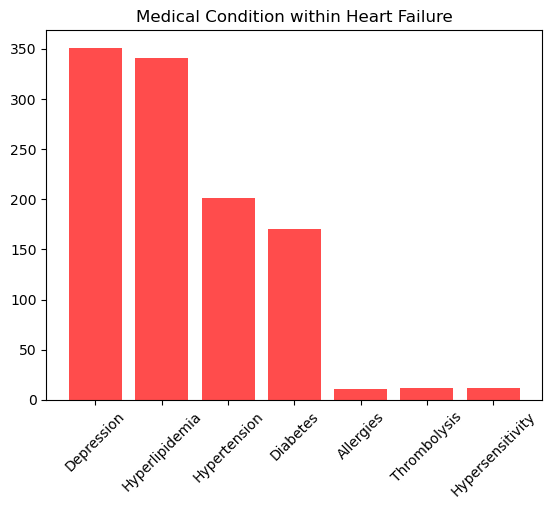

In [74]:
# Plot the data
plt.bar(amount_conditions, patients_conditions , align='center', color='r', alpha=0.7)

# Creating the ticks for our bar chart's x axis
tick_locations = [value for value in amount_conditions]
plt.xticks(tick_locations, medical_conditions, rotation= 45)
plt.title("Medical Condition within Heart Failure")
plt.show()

### Showing Correlation between Age and Cholesterol levels

0.1848231719505433


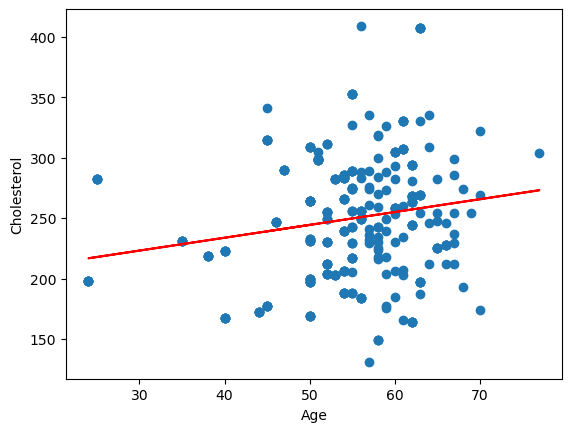

In [75]:
# Plotting data
x_values = fic_df["Age"]
y_values = fic_df["Cholesterol"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.xlabel("Age")
plt.ylabel("Cholesterol")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
print(rvalue)
plt.show()

### Showing Mean Cholesterol  between Age and Cholesterol levels

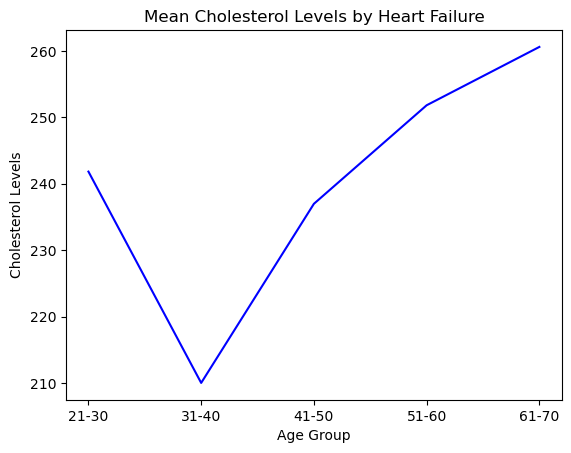

In [79]:
# Getting mean value of cholesterol levels
mean_chol_by_age = fic_df.groupby('Age Group')['Cholesterol'].mean()

# Plotting the data
plt.plot(mean_chol_by_age.index,mean_chol_by_age,color="blue" )
plt.xlabel('Age Group')
plt.ylabel('Cholesterol Levels')
plt.title('Mean Cholesterol Levels by Heart Failure')
plt.show()

### Plotting between Depression  and Electrolyte levels

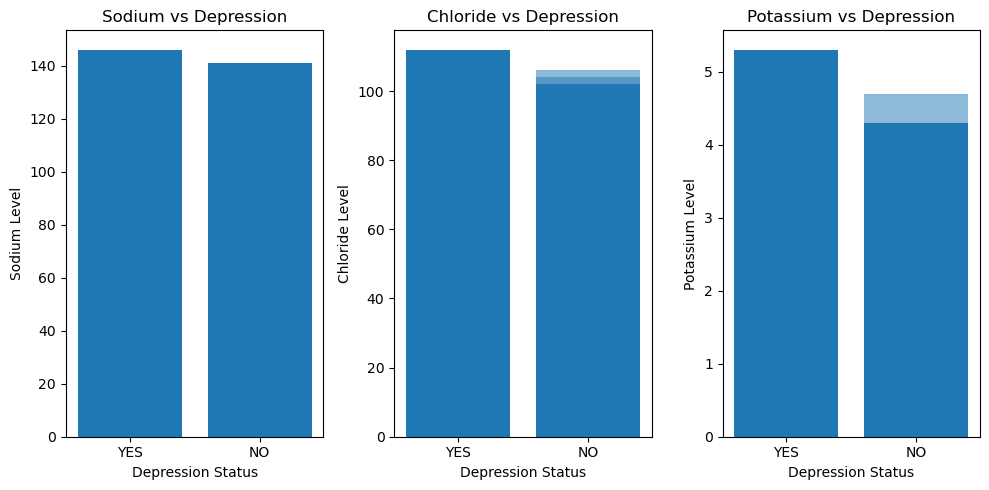

In [83]:
# Plotting Data
plt.figure(figsize=(10, 5))
plt.subplot(1, 3, 1)
plt.bar(fic_df['Depression'], fic_df['Serum Sodium'], alpha=0.5)
plt.ylabel('Sodium Level')
plt.xlabel('Depression Status')
plt.title('Sodium vs Depression')

plt.subplot(1, 3, 2)
plt.bar(fic_df['Depression'], fic_df['Serum Chloride'], alpha=0.5)
plt.ylabel('Chloride Level')
plt.xlabel('Depression Status')
plt.title('Chloride vs Depression')

plt.subplot(1, 3, 3)
plt.bar(fic_df['Depression'], fic_df['Serum Potassium'], alpha=0.5)
plt.ylabel('Potassium Level')
plt.xlabel('Depression Status')
plt.title('Potassium vs Depression')

plt.tight_layout()
plt.show()

### Plotting  between Depression and BP levels

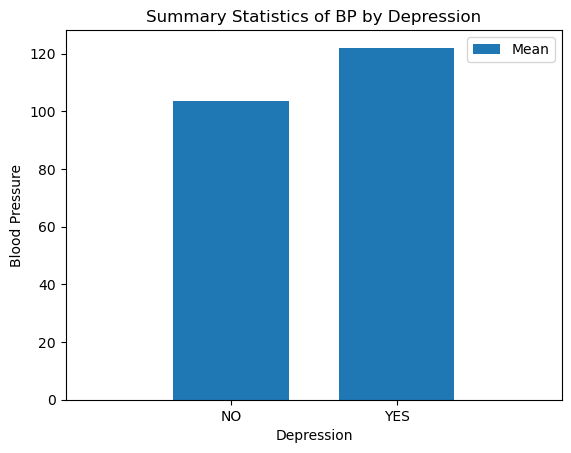

In [97]:
# Summary Variable for plot
summary_statistics = fic_df.groupby("Depression")["Blood Pressure"].agg(['mean', 'median', 'var', 'std', 'sem'])

# Plot mean of data
plt.bar(summary_statistics.index, summary_statistics['mean'], label='Mean',width=0.7, align='center')
plt.xlabel('Depression')
plt.ylabel('Blood Pressure')
plt.title('Summary Statistics of BP by Depression')
plt.xlim(-1, 2)
plt.legend()
plt.show()

### Plotting  between Depression and BGR levels

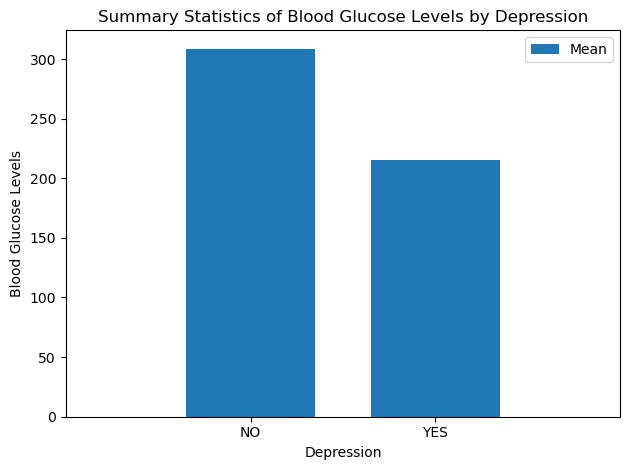

In [100]:
# Setting up Summary Variable
summary_statistics = fic_df.groupby("Depression")["Blood Glucose Level"].agg(['mean', 'median', 'var', 'std', 'sem'])

summary_statistics

# Plot mean of data
plt.bar(summary_statistics.index, summary_statistics['mean'], label='Mean',width=0.7)

plt.xlabel('Depression')
plt.ylabel('Blood Glucose Levels')
plt.title('Summary Statistics of Blood Glucose Levels by Depression')
plt.xlim(-1, 2)
plt.tight_layout()
plt.legend()
plt.show()

### Using a boxplot to show potential outliers using Blood Glucose Levels within Age Groups

Text(0, 0.5, 'Blood glucose levels')

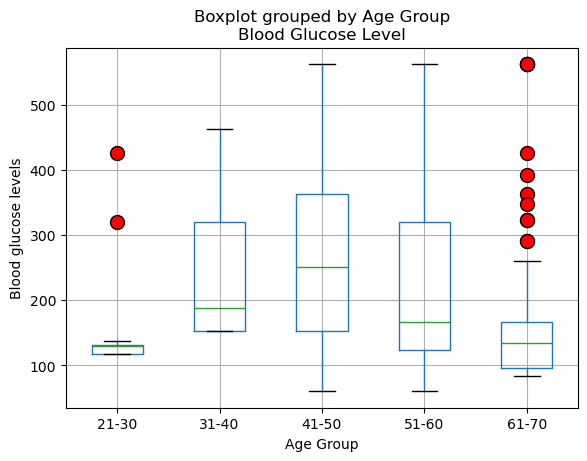

In [101]:
# Plotting dataframe 
fic_df.boxplot(column='Blood Glucose Level', by='Age Group',flierprops=dict(marker='o', markerfacecolor='r', markersize=10))

# Adding Labels
plt.xlabel('Age Group')
plt.ylabel('Blood glucose levels')

### Family History of Heart Failure

In [119]:
# Varibales for plotting data
family_history = fic_df['F.History'].value_counts()
labels = ['Family History[Yes]', 'Family History[No]']
explode = (.1, 0)

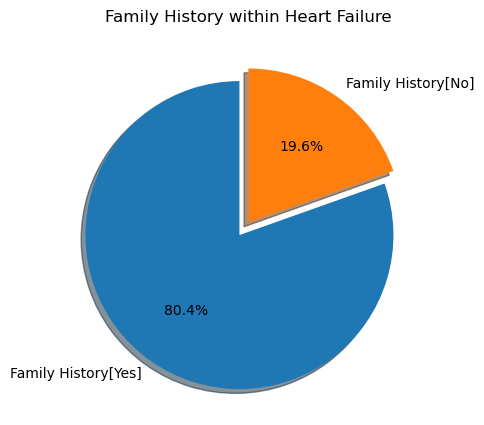

In [120]:
# Plot Data
plt.figure(figsize=(10,5))
plt.pie(fic_df['F.History'].value_counts(), labels=labels,
        autopct='%1.1f%%', shadow=True, explode= explode, startangle=90)
plt.title("Family History within Heart Failure")
plt.show()

In [105]:
# Count target variable for gender
fic_df["Gender"].value_counts()

Gender
Male      285
Female     83
Name: count, dtype: int64

In [106]:
# Creating dataframe
pd.crosstab(fic_df["F.History"],fic_df["Gender"])

Gender,Female,Male
F.History,,
0,83,213
1,0,72


Text(0.5, 1.0, 'Family History of Heart Failure by Gender')

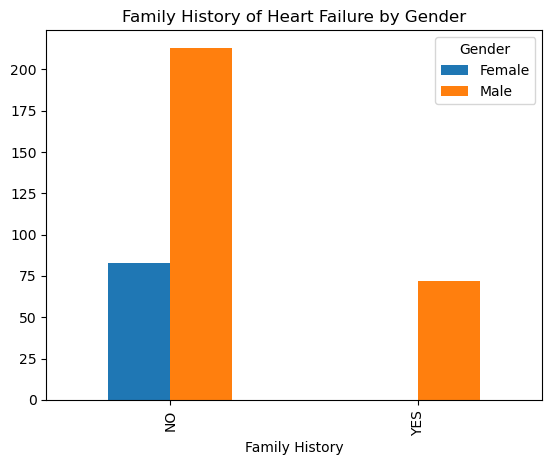

In [111]:
# Plotting Dataframe
pd.crosstab(fic_df["Family History"],fic_df["Gender"]).plot(kind="bar")
plt.title("Family History of Heart Failure by Gender")